In [1]:

######## snakemake preamble start (automatically inserted, do not edit) ########
library(methods)
Snakemake <- setClass(
    "Snakemake",
    slots = c(
        input = "list",
        output = "list",
        params = "list",
        wildcards = "list",
        threads = "numeric",
        log = "list",
        resources = "list",
        config = "list",
        rule = "character",
        bench_iteration = "numeric",
        scriptdir = "character",
        source = "function"
    )
)
snakemake <- Snakemake(
    input = list('data/ATAC_predictions_train_20_predict_80/ATAC_pred_lasso_normalized_trimmed_formatted_standardized.rds', 'data/sample_types.txt', "input_predictions" = 'data/ATAC_predictions_train_20_predict_80/ATAC_pred_lasso_normalized_trimmed_formatted_standardized.rds', "input_sample_types" = 'data/sample_types.txt'),
    output = list('Classification_output/LDA_normalized_trimmed.rds', "LDA_output" = 'Classification_output/LDA_normalized_trimmed.rds'),
    params = list(),
    wildcards = list(),
    threads = 1,
    log = list('logs/processed_notebooks/Classification/LDA_normalized_trimmed.r.ipynb', "notebook" = 'logs/processed_notebooks/Classification/LDA_normalized_trimmed.r.ipynb'),
    resources = list('mem_mb', 'disk_mb', 'tmpdir', 'time', "mem_mb" = 200000, "disk_mb" = 1000, "tmpdir" = '/scratch/57062189', "time" = '12:00:00'),
    config = list(),
    rule = 'LDA',
    bench_iteration = as.numeric(NA),
    scriptdir = '/faststorage/project/DELFI1/Workspaces/CarmenAndAnika/Classification',
    source = function(...){
        wd <- getwd()
        setwd(snakemake@scriptdir)
        source(...)
        setwd(wd)
    }
)
setwd('/faststorage/project/DELFI1/Workspaces/CarmenAndAnika');

######## snakemake preamble end #########


### LDA

In [2]:
library(tidyverse)
library(MASS)
library(pROC)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select

Type 'citation("pROC")' for a citation.

Attaching package: ‘pROC’

The following objects are masked from ‘package:stats’:

    cov, smooth, var



In [3]:
#data <- readRDS("../data/ATAC_predictions_train_XX_predict_XX/ATAC_pred_lasso_normalized_trimmed_formatted_standardized.rds")
data <- readRDS(snakemake@input[["input_predictions"]])

#data <- data[1:100, 1:50]
head(data)

ERROR while rich displaying an object: Error in sprintf(wrap, header, body): 'fmt' length exceeds maximal format length 8192

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. 

,sample,chr10_400,chr10_40,chr10_4,chr10_401,chr10_402,chr10_403,chr10_404,chr10_405,chr10_406,...,chr9_39,chr9_391,chr9_392,chr9_393,chr9_394,chr9_395,chr9_396,chr9_397,chr9_398,chr9_399
V1,PGDX16568P,0.7621097,-0.8032188,0.6402487,-0.8688929,-0.4792134,-0.5096581,0.02594817,0.7295906,0.7738027,...,-0.405123632,0.59187320,-0.29125018,-0.58276010,0.3792968,-0.04366948,0.9183014,0.7664238,0.9980457,-1.0572778
V2,PGDX16569P,0.7057109,-0.8227554,0.7868749,-1.0407754,-0.9284673,-0.4139074,-0.16594560,0.7765621,0.5761691,...,-0.849313481,0.39431325,0.05197526,-0.36318168,0.1744439,-0.13785162,0.5392077,0.3942941,1.7972449,-0.3619464
V3,PGDX16570P,0.4891340,-1.1448217,0.9478602,-1.0930696,-0.5115270,-0.7552269,-0.48824613,0.9537215,0.6624865,...,-0.871941533,-0.06389996,-0.22907645,-0.32470631,-0.6251958,0.17051719,0.6882020,0.1744819,1.4357406,-0.2330366
V4,PGDX16571P,0.6882727,-0.8585679,0.6248431,-0.8310281,-0.5335804,-0.5125528,-0.34185944,0.9281618,0.4768828,...,-0.005893625,0.18185487,0.32387927,0.04577069,0.2752394,0.22750427,0.6333635,0.8413436,1.2819797,0.5629469
V5,PGDX16579P,0.5801896,-1.1674832,0.7883376,-1.0498406,-1.2475692,-0.7345196,-0.18778863,0.2546093,0.2920616,...,-0.067895629,-0.05197828,-0.18308631,-0.70242368,-0.4281903,-0.06235782,1.0764914,1.1411410,0.8795170,-0.4910720
V6,PGDX16580P,0.6831409,-0.8712906,0.7199476,-1.1853489,-0.8520159,-0.6829992,-0.35499242,0.8598551,0.3870744,...,-0.735310376,0.36325245,0.20814984,-0.50307962,0.2609116,0.53933999,1.0772367,0.6906960,1.7696570,-0.4181884


In [4]:
sample_types <- read.table(snakemake@input[["input_sample_types"]], header = F, sep = " ")
#sample_types <- read.table("../data/sample_types.txt", header = F, sep = " ")

colnames(sample_types) <- c("sample", "sample_type")
head(sample_types)

sample,sample_type
PGDX10344P1,Gastric_cancer
PGDX10346P1,Gastric_cancer
PGDX10349P1,Gastric_cancer
PGDX10351P1,Gastric_cancer
PGDX10566P,Ovarian_Cancer
PGDX10567P,Ovarian_Cancer


In [5]:
data <- merge(data, sample_types, by="sample")
head(data)
data <- data %>% mutate(sample_type01 = ifelse(sample_type == "Healthy", 0, 1))

ERROR while rich displaying an object: Error in sprintf(wrap, header, body): 'fmt' length exceeds maximal format length 8192

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. 

sample,chr10_400,chr10_40,chr10_4,chr10_401,chr10_402,chr10_403,chr10_404,chr10_405,chr10_406,...,chr9_391,chr9_392,chr9_393,chr9_394,chr9_395,chr9_396,chr9_397,chr9_398,chr9_399,sample_type
PGDX10344P1,0.28476325,-0.8212573,1.0277500,-0.7094983,-0.2327985,-0.7836319,0.01979819,0.2624251,0.3128992,...,-0.34089350,0.006860094,-0.5010935,-0.2043651,0.02437101,0.57938365,-0.4136060,1.3160044,-0.26256223,Gastric_cancer
PGDX10346P1,1.28471727,-0.8295661,1.0145149,-0.6213053,-0.8143027,-0.6479755,-0.06975614,0.9264024,0.4895216,...,-0.17629217,-0.421600296,-0.5810840,0.1408379,0.21122926,1.13429106,0.8116547,0.3187471,-0.48265821,Gastric_cancer
PGDX10349P1,0.07110482,-1.0079115,0.3347017,-1.1303365,-0.8177276,-0.9202015,-0.08484151,0.5183954,2.2808829,...,1.22409122,0.527804492,-0.1435833,0.4967880,0.15991730,0.89522351,0.5305742,1.6767953,-0.02839009,Gastric_cancer
PGDX10351P1,1.36298501,-1.4848879,0.4225454,-1.3192129,-0.7097136,-0.4653093,-0.42147744,0.9729417,0.5944980,...,0.43571295,0.872833915,-0.0670184,0.7394425,0.13690205,1.29732717,0.4739056,1.4153912,-0.12217374,Gastric_cancer
PGDX10566P,0.40245603,-1.0782760,1.2759516,-0.8646247,-0.5192562,-0.8555661,-0.22999396,0.7699482,0.4825674,...,0.04951928,0.173364771,-0.8705736,0.4935296,-0.17648798,-0.02395699,0.3182328,1.3930824,-0.47078676,Ovarian_Cancer
PGDX10567P,0.97825189,-0.6787169,1.0934262,-0.1749540,-0.6319351,-0.7585842,0.22653017,0.5994301,0.6407291,...,0.50968208,-0.241967372,-0.6951369,0.2412607,0.11914801,0.07982386,0.2854560,1.7946488,-0.69550001,Ovarian_Cancer


In [6]:
head(data)

ERROR while rich displaying an object: Error in sprintf(wrap, header, body): 'fmt' length exceeds maximal format length 8192

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. 

sample,chr10_400,chr10_40,chr10_4,chr10_401,chr10_402,chr10_403,chr10_404,chr10_405,chr10_406,...,chr9_392,chr9_393,chr9_394,chr9_395,chr9_396,chr9_397,chr9_398,chr9_399,sample_type,sample_type01
PGDX10344P1,0.28476325,-0.8212573,1.0277500,-0.7094983,-0.2327985,-0.7836319,0.01979819,0.2624251,0.3128992,...,0.006860094,-0.5010935,-0.2043651,0.02437101,0.57938365,-0.4136060,1.3160044,-0.26256223,Gastric_cancer,1
PGDX10346P1,1.28471727,-0.8295661,1.0145149,-0.6213053,-0.8143027,-0.6479755,-0.06975614,0.9264024,0.4895216,...,-0.421600296,-0.5810840,0.1408379,0.21122926,1.13429106,0.8116547,0.3187471,-0.48265821,Gastric_cancer,1
PGDX10349P1,0.07110482,-1.0079115,0.3347017,-1.1303365,-0.8177276,-0.9202015,-0.08484151,0.5183954,2.2808829,...,0.527804492,-0.1435833,0.4967880,0.15991730,0.89522351,0.5305742,1.6767953,-0.02839009,Gastric_cancer,1
PGDX10351P1,1.36298501,-1.4848879,0.4225454,-1.3192129,-0.7097136,-0.4653093,-0.42147744,0.9729417,0.5944980,...,0.872833915,-0.0670184,0.7394425,0.13690205,1.29732717,0.4739056,1.4153912,-0.12217374,Gastric_cancer,1
PGDX10566P,0.40245603,-1.0782760,1.2759516,-0.8646247,-0.5192562,-0.8555661,-0.22999396,0.7699482,0.4825674,...,0.173364771,-0.8705736,0.4935296,-0.17648798,-0.02395699,0.3182328,1.3930824,-0.47078676,Ovarian_Cancer,1
PGDX10567P,0.97825189,-0.6787169,1.0934262,-0.1749540,-0.6319351,-0.7585842,0.22653017,0.5994301,0.6407291,...,-0.241967372,-0.6951369,0.2412607,0.11914801,0.07982386,0.2854560,1.7946488,-0.69550001,Ovarian_Cancer,1


In [7]:
data <- data %>% dplyr::select(-sample_type)
data <- data %>% dplyr::select(-sample)

In [8]:
head(data)

ERROR while rich displaying an object: Error in sprintf(wrap, header, body): 'fmt' length exceeds maximal format length 8192

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. 

chr10_400,chr10_40,chr10_4,chr10_401,chr10_402,chr10_403,chr10_404,chr10_405,chr10_406,chr10_407,...,chr9_391,chr9_392,chr9_393,chr9_394,chr9_395,chr9_396,chr9_397,chr9_398,chr9_399,sample_type01
0.28476325,-0.8212573,1.0277500,-0.7094983,-0.2327985,-0.7836319,0.01979819,0.2624251,0.3128992,1.45146500,...,-0.34089350,0.006860094,-0.5010935,-0.2043651,0.02437101,0.57938365,-0.4136060,1.3160044,-0.26256223,1
1.28471727,-0.8295661,1.0145149,-0.6213053,-0.8143027,-0.6479755,-0.06975614,0.9264024,0.4895216,0.04814456,...,-0.17629217,-0.421600296,-0.5810840,0.1408379,0.21122926,1.13429106,0.8116547,0.3187471,-0.48265821,1
0.07110482,-1.0079115,0.3347017,-1.1303365,-0.8177276,-0.9202015,-0.08484151,0.5183954,2.2808829,1.33462998,...,1.22409122,0.527804492,-0.1435833,0.4967880,0.15991730,0.89522351,0.5305742,1.6767953,-0.02839009,1
1.36298501,-1.4848879,0.4225454,-1.3192129,-0.7097136,-0.4653093,-0.42147744,0.9729417,0.5944980,0.97671516,...,0.43571295,0.872833915,-0.0670184,0.7394425,0.13690205,1.29732717,0.4739056,1.4153912,-0.12217374,1
0.40245603,-1.0782760,1.2759516,-0.8646247,-0.5192562,-0.8555661,-0.22999396,0.7699482,0.4825674,0.76308429,...,0.04951928,0.173364771,-0.8705736,0.4935296,-0.17648798,-0.02395699,0.3182328,1.3930824,-0.47078676,1
0.97825189,-0.6787169,1.0934262,-0.1749540,-0.6319351,-0.7585842,0.22653017,0.5994301,0.6407291,0.64706533,...,0.50968208,-0.241967372,-0.6951369,0.2412607,0.11914801,0.07982386,0.2854560,1.7946488,-0.69550001,1


In [9]:
##################### CODE FOR REMOVING COLLINEAR FEATURES ###########################

#sample_type01 <- data %>% dplyr::select(sample_type01)
#data_clean <- data %>% dplyr::select(-sample_type01)
#dim(data_clean)
#tmp <- cor(data_clean)

######################################################################################

In [10]:
##################### CODE FOR REMOVING COLLINEAR FEATURES ###########################

#tmp[upper.tri(tmp)] <- 0
#diag(tmp) <- 0
#data_new_clean <- data_clean[, !apply(tmp, 2, function(x) any(abs(x) > 0.9, na.rm = TRUE))]
#head(data_new_clean)
#dim(data_new_clean)

#data <- data_new_clean %>% mutate(sample_type01 = sample_type01$sample_type01)
#head(data)

######################################################################################

In [11]:
cross_validation <- function(dataset, k_inner_cv, k_outer_cv){
    
    observed  <- dataset$sample_type01
    return_tibble <- tibble(observed = observed)
    
    for (i in 1:k_outer_cv){ # repeated Cross-validation loop
        set.seed(i)
        cvfolds <- cut(seq_len(nrow(dataset)), breaks = k_inner_cv, labels = F)
        cvfolds <- sample(cvfolds)

        predicted <- rep(NA, nrow(dataset))

        for (n in 1:k_inner_cv){
            rows      <- which(cvfolds==n)
            testdata  <- dataset[rows,]
            testlabels <- testdata$sample_type01
            testdata <- testdata %>% dplyr::select(-sample_type01)

            traindata <- dataset[-rows,]
            trainlabels <- traindata$sample_type01
            #traindata <- traindata %>% dplyr::select(-sample_type01)


            fit       <- lda(sample_type01 ~ ., data=traindata)
            prediction <- predict(fit, testdata)
            predicted[rows] <- prediction$posterior[,2]
        }
        
    current_round_tibble <- tibble(predicted = predicted)
    return_tibble <- cbind(return_tibble, current_round_tibble)
    } # end of outer cv loop

    return(return_tibble)
}

In [12]:
results <- as.data.frame(cross_validation(data, k_inner_cv = 10, k_outer_cv = 10))

Warning message in lda.default(x, grouping, ...):
“variables are collinear”Warning message in lda.default(x, grouping, ...):
“variables are collinear”Warning message in lda.default(x, grouping, ...):
“variables are collinear”Warning message in lda.default(x, grouping, ...):
“variables are collinear”Warning message in lda.default(x, grouping, ...):
“variables are collinear”Warning message in lda.default(x, grouping, ...):
“variables are collinear”Warning message in lda.default(x, grouping, ...):
“variables are collinear”Warning message in lda.default(x, grouping, ...):
“variables are collinear”Warning message in lda.default(x, grouping, ...):
“variables are collinear”Warning message in lda.default(x, grouping, ...):
“variables are collinear”Warning message in lda.default(x, grouping, ...):
“variables are collinear”Warning message in lda.default(x, grouping, ...):
“variables are collinear”Warning message in lda.default(x, grouping, ...):
“variables are collinear”Warning message in lda.de

In [13]:
results <- tibble(results, .name_repair = "unique")
head(results)

New names:
* predicted -> predicted...2
* predicted -> predicted...3
* predicted -> predicted...4
* predicted -> predicted...5
* predicted -> predicted...6
* ...


observed,predicted...2,predicted...3,predicted...4,predicted...5,predicted...6,predicted...7,predicted...8,predicted...9,predicted...10,predicted...11
1,0.4280139,0.4572829,0.4045602,0.4274476,0.4362458,0.4262941,0.4328707,0.4345714,0.4971108,0.4443425
1,0.4166959,0.3483635,0.4632095,0.3946658,0.3763273,0.3995463,0.3229993,0.4349125,0.4001746,0.3543592
1,0.9729562,0.9743726,0.9791898,0.9759273,0.9656363,0.9704542,0.9724899,0.9751545,0.9704233,0.9763816
1,0.3882664,0.3703939,0.3739635,0.2884217,0.4120391,0.3619067,0.4237132,0.3556275,0.3091521,0.3151468
1,0.5402984,0.6212922,0.6231354,0.5964793,0.6326308,0.5966377,0.5567068,0.6265027,0.6151459,0.6696959
1,0.8267292,0.8342506,0.8113039,0.8117587,0.8428975,0.7931930,0.7986084,0.8096733,0.8217113,0.8329040


In [14]:
saveRDS(results, file = snakemake@output[["LDA_output"]])

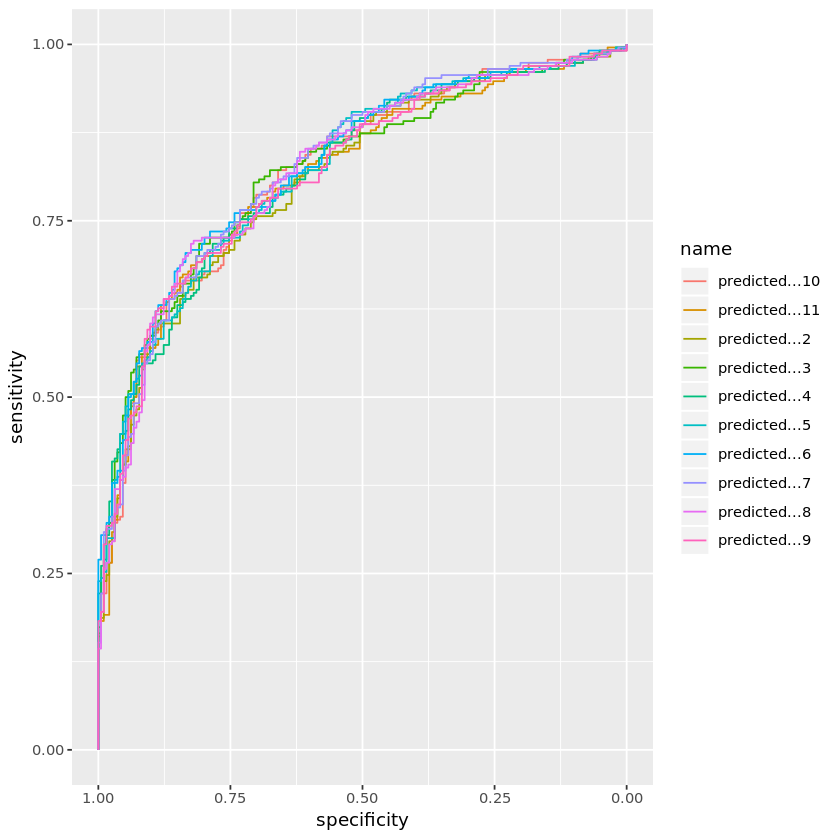

In [15]:
# Create multiple curves to plot
rocs <- roc(observed ~ predicted...2 + 
                    predicted...3 + 
                    predicted...4 + 
                    predicted...5 + 
                    predicted...6 +
                    predicted...7 +
                    predicted...8 + 
                    predicted...9 + 
                    predicted...10 + 
                    predicted...11, data = results)
ggroc(rocs)

In [16]:
roc1 <- roc(results$observed, results$predicted...2)
roc2 <- roc(results$observed, results$predicted...3)
roc3 <- roc(results$observed, results$predicted...4)
roc4 <- roc(results$observed, results$predicted...5)
roc5 <- roc(results$observed, results$predicted...6)
roc6 <- roc(results$observed, results$predicted...7)
roc7 <- roc(results$observed, results$predicted...8)
roc8 <- roc(results$observed, results$predicted...9)
roc9 <- roc(results$observed, results$predicted...10)
roc10 <- roc(results$observed, results$predicted...11)

In [17]:
paste("Mean AUC over 10 repetitions of 10-fold CV: ", mean(c(auc(roc1), auc(roc2), auc(roc3), auc(roc4), auc(roc5), auc(roc6), auc(roc7), auc(roc8), auc(roc9), auc(roc10))), sep = "")

[1] "Mean AUC over 10 repetitions of 10-fold CV: 0.819610040340654"

In [18]:
results_01 <- results %>% mutate(predicted...2_01 = ifelse(predicted...2 > 0.5, 1, 0), 
                                 predicted...3_01 = ifelse(predicted...3 > 0.5, 1, 0), 
                                 predicted...4_01 = ifelse(predicted...4 > 0.5, 1, 0),
                                 predicted...5_01 = ifelse(predicted...5 > 0.5, 1, 0),
                                 predicted...6_01 = ifelse(predicted...6 > 0.5, 1, 0),
                                 predicted...7_01 = ifelse(predicted...7 > 0.5, 1, 0),
                                 predicted...8_01 = ifelse(predicted...8 > 0.5, 1, 0),
                                 predicted...9_01 = ifelse(predicted...9 > 0.5, 1, 0),
                                 predicted...10_01 = ifelse(predicted...10 > 0.5, 1, 0),
                                 predicted...11_01 = ifelse(predicted...11 > 0.5, 1, 0))

In [19]:
error_rates <- c(mean(results_01$observed != results_01$predicted...2_01),
               mean(results_01$observed != results_01$predicted...3_01), 
               mean(results_01$observed != results_01$predicted...4_01),
               mean(results_01$observed != results_01$predicted...5_01),
               mean(results_01$observed != results_01$predicted...6_01),
               mean(results_01$observed != results_01$predicted...7_01),
               mean(results_01$observed != results_01$predicted...8_01),
               mean(results_01$observed != results_01$predicted...9_01), 
               mean(results_01$observed != results_01$predicted...10_01), 
               mean(results_01$observed != results_01$predicted...11_01))

error_rates

paste("Mean error rate over 10 repetitions of 10-fold CV: ", mean(error_rates), sep = "")

[1] 0.2735849 0.2594340 0.2594340 0.2641509 0.2500000 0.2570755 0.2617925
 [8] 0.2617925 0.2570755 0.2641509

[1] "Mean error rate over 10 repetitions of 10-fold CV: 0.260849056603774"

In [20]:
accuracies <- c(mean(results_01$observed == results_01$predicted...2_01),
               mean(results_01$observed == results_01$predicted...3_01), 
               mean(results_01$observed == results_01$predicted...4_01),
               mean(results_01$observed == results_01$predicted...5_01),
               mean(results_01$observed == results_01$predicted...6_01),
               mean(results_01$observed == results_01$predicted...7_01),
               mean(results_01$observed == results_01$predicted...8_01),
               mean(results_01$observed == results_01$predicted...9_01), 
               mean(results_01$observed == results_01$predicted...10_01), 
               mean(results_01$observed == results_01$predicted...11_01))

accuracies
paste("Mean accuracy over 10 repetitions of 10-fold CV: ", mean(accuracies), sep = "")

[1] 0.7264151 0.7405660 0.7405660 0.7358491 0.7500000 0.7429245 0.7382075
 [8] 0.7382075 0.7429245 0.7358491

[1] "Mean accuracy over 10 repetitions of 10-fold CV: 0.739150943396226"